In [2]:
from sklearn.cluster import  KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv('450 cars evaluation kmeans.csv' , encoding = 'gb2312')
data.head()

,car_number,行车里程,平均速度得分,熄火滑行得分,怠速预热得分,超长怠速得分,急加速得分,急减速得分,急转弯得分,疲劳驾驶得分,日累计疲劳驾驶得分,score
0,AA00001_normal.csv,6513,50,70,20,10,85,65,20,100,100,520
1,AA00002_normal.csv,749,75,100,65,80,85,65,85,100,100,755
2,AA00004_normal.csv,597,75,80,65,80,65,65,20,100,100,650
3,AA00036_normal.csv,304,75,100,85,10,65,40,100,100,100,675
4,AA00045_normal.csv,222,75,100,85,90,65,65,40,100,100,720


In [37]:
index_data = data.set_index('car_number')
index_data.head()

,行车里程,平均速度得分,熄火滑行得分,怠速预热得分,超长怠速得分,急加速得分,急减速得分,急转弯得分,疲劳驾驶得分,日累计疲劳驾驶得分,score
car_number,,,,,,,,,,,
AA00001_normal.csv,6513,50,70,20,10,85,65,20,100,100,520
AA00002_normal.csv,749,75,100,65,80,85,65,85,100,100,755
AA00004_normal.csv,597,75,80,65,80,65,65,20,100,100,650
AA00036_normal.csv,304,75,100,85,10,65,40,100,100,100,675
AA00045_normal.csv,222,75,100,85,90,65,65,40,100,100,720


In [36]:
from sklearn.preprocessing import MinMaxScaler
index_data = data.set_index('car_number')
scaler = MinMaxScaler(feature_range=(0,100))
scaler.fit(index_data.loc[:,'行车里程'].reshape(-1, 1))
# print(scaler.data_max_)
# print(scaler.data_min_)
# print(scaler.data_range_)

scaler_data = scaler.transform(index_data)
# index_data.to_csv('450 cars evaluation minmax.csv', encoding = 'gb2312')

AttributeError: 'Series' object has no attribute 'reshape'

In [33]:
#异常归一化
def abnormal_scaler(df,col,k):
    min_ = df.nsmallest(k,col)[col].iloc[k-1:].values
    max_ = df.nlargest(k,col)[col].iloc[k-1:].values
    print(min_,max_)
    df[col] = (df[col]-min_)/(max_-min_)*100
    
    return df[col]
# print(scale_data.nlargest(5,'用户当月账户余额（元）'))
# print(scale_data.nsmallest(5,'用户当月账户余额（元）'))
# scale_data.nlargest(5,'用户当月账户余额（元）')['用户当月账户余额（元）'].iloc[4:].values
# data.loc[:,'行车里程'] = data.loc[:,'行车里程'].apply(abnormal_scaler(data,''))
index_data.loc[:,'行车里程'] = abnormal_scaler(index_data,'行车里程',5)
index_data.to_csv('450 cars evaluation minmax.csv', encoding = 'gb2312')

[48] [16550]


In [41]:
k = 4
km_data = index_data.drop('行车里程',axis = 1)
km = KMeans(n_clusters = k)
km.fit(km_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:

np.set_printoptions(suppress=True)
print(km.cluster_centers_)

[[ 72.64423077  88.84615385  55.28846154  35.48076923  56.58653846
   44.27884615  25.04807692  99.80769231  99.42307692 577.40384615]
 [ 81.45038168  93.96946565  75.30534351  75.49618321  60.91603053
   43.96946565  79.3129771  100.         100.         710.41984733]
 [ 74.8015873   93.80952381  70.          82.06349206  63.69047619
   51.03174603  25.95238095  99.84126984  99.52380952 660.71428571]
 [ 86.34831461  97.07865169  84.94382022  93.93258427  67.19101124
   56.06741573  89.88764045 100.         100.         775.4494382 ]]


In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(km_data)
# print pca.explained_variance_ratio_
# print pca.explained_variance_

No handles with labels found to put in legend.


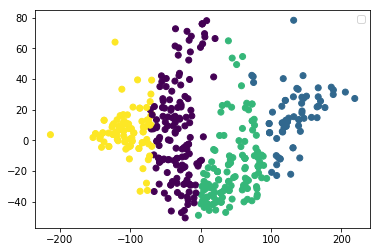

In [50]:
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_pred)
plt.legend()
plt.show()

In [ ]:
   平均速度	      熄火滑行	   怠速预热 	超长怠速	急加速  	急减速     	急转弯 	疲劳驾驶 	  日累计疲劳	   score
0 [ 72.64423077  88.84615385  55.28846154  35.48076923  56.58653846 44.27884615  25.04807692  99.80769231  99.42307692  577.40384615]
1 [ 81.45038168  93.96946565  75.30534351  75.49618321  60.91603053 43.96946565  79.3129771   100.         100.         710.41984733]
2 [ 74.8015873   93.80952381  70.          82.06349206  63.69047619 51.03174603  25.95238095  99.84126984  99.52380952  660.71428571]
3 [ 86.34831461  97.07865169  84.94382022  93.93258427  67.19101124 56.06741573  89.88764045  100.         100.         775.4494382 ]

In [ ]:
0:150 第一类： 开车较慢，且驾驶习惯不好，油耗较高，行驶过程中怠速较多，且行车频繁变速，过弯道时车速过快，连续行驶时间较长，且油耗较高，
               行车不安全，且不能达到节能的开车标准。
1:68  第二类： 平均速度较快，行车不平稳，怠速时间过长，容易造成油耗较大，且尾气排放污染空气，不太节能
2:136 第三类： 平均速度较慢，存在熄火滑行，紧急变道等不安全因素，车辆行驶不平稳容易造成油耗增加，车辆预热时间过长，不太节能且行车存在危险
               因素
3: 96 第四类： 开车较为平稳，拥有良好的驾驶习惯，能够达到节能环保行车的良好驾驶规范标准。

由上分析可得，行车存在危险因素且没有良好的驾驶节能习惯的司机还是占大多数，
首先，在行车过程中应注重行车安全，行驶途中应平稳行车，避免突然变速，同时停车时确认停车路段与停车操作，避免熄火滑行，还有疲劳驾驶也说一下
其次，遵守节能驾驶的规范，养成良好的驾驶习惯，为了降低油耗，应尽量减少怠速预热时长，。急加速急减速也耗油。。。。。

In [49]:
from collections import defaultdict
print(y_pred)

label_dict = defaultdict(int)
for i in y_pred:
    label_dict[i] +=1
label_dict

[1 3 2 0 0 2 1 0 0 2 1 1 1 2 2 1 1 1 1 2 1 2 2 0 2 2 2 2 0 0 0 0 2 0 1 0 2
 1 2 0 2 0 0 2 3 2 0 2 2 0 0 2 0 0 0 3 0 0 0 0 0 0 2 2 0 3 0 0 1 1 2 0 2 1
 3 3 2 0 2 1 0 2 2 3 3 2 0 3 0 0 0 2 0 2 2 3 3 0 3 2 3 3 2 3 3 2 0 2 3 0 3
 3 0 2 0 1 1 1 3 0 0 0 1 1 1 1 0 2 0 2 1 2 2 0 1 2 2 0 1 2 1 1 2 2 1 2 2 2
 2 2 2 2 1 2 0 0 2 2 0 1 2 3 2 1 1 0 3 1 2 0 2 2 3 2 1 1 0 2 1 1 2 2 2 1 2
 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 0 2 1 0 2 1 1 2 1 1 3 2 2 0 2 2
 0 2 3 1 2 0 3 2 3 3 3 3 0 0 2 3 2 1 3 2 2 0 3 3 0 2 0 2 0 0 2 2 1 0 0 2 3
 3 0 0 3 3 0 2 3 1 0 2 0 0 2 3 0 0 0 3 0 2 0 3 0 0 1 3 0 2 0 0 2 2 2 0 0 0
 2 3 3 3 3 2 0 2 2 2 2 2 2 0 0 2 0 2 3 3 0 0 2 0 0 2 2 2 0 3 3 2 0 0 3 3 0
 0 3 2 0 0 3 3 2 0 2 3 3 0 0 0 0 0 2 3 0 0 0 0 2 0 0 2 2 0 0 3 3 0 0 3 3 0
 2 0 2 3 0 0 3 0 3 3 0 1 3 2 3 3 0 3 0 0 3 1 0 2 1 3 0 0 0 0 3 3 3 3 3 0 3
 3 0 3 0 3 3 3 3 0 3 0 3 0 3 0 3 3 3 0 2 0 2 0 3 2 2 2 0 2 2 2 0 0 3 2 2 0
 3 3 3 0 0 0]


defaultdict(int, {1: 68, 3: 96, 2: 136, 0: 150})

In [ ]:
1. 提取聚类特征（450辆车的得分）
2. 进行聚类，聚类数目为4
3. 对数据进行PCA处理，方便可视化（得到聚类结果图）
4. 分析聚类结果 ：得到每一类簇的人群数量；根据每一类簇的中心，分析该类簇特征，得到司机驾驶画像； 